# 1. Data Preprocessing
Before building models, we must ensure the data is clean and properly formatted. This includes handling missing values, standardizing numerical features, and encoding categorical variables.


Shape of the dataset: (3328, 14)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       3328 non-null   object 
 1   year                          3328 non-null   int64  
 2   population                    3328 non-null   int64  
 3   gdp                           3328 non-null   float64
 4   co2_per_capita                3328 non-null   float64
 5   co2_including_luc_per_capita  3328 non-null   float64
 6   energy_per_capita             3328 non-null   float64
 7   coal_co2                      3328 non-null   float64
 8   gas_co2                       3328 non-null   float64
 9   oil_co2                       3328 non-null   float64
 10  methane                       3328 non-null   float64
 11  nitrous_oxide                 3328 non-null   float64
 12  pri

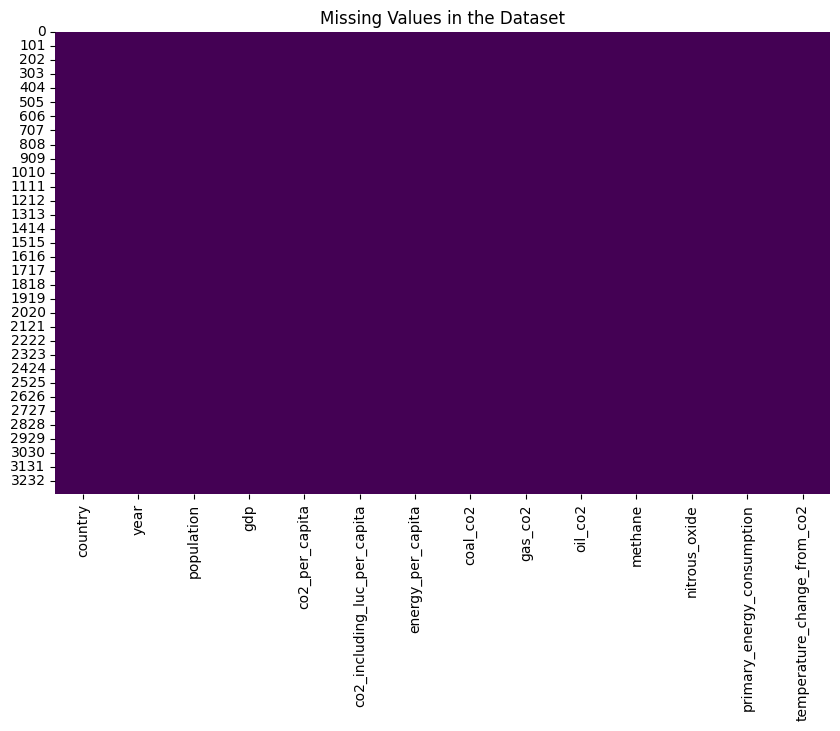


Missing values filled with column median for numeric columns.


In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBRegressor

# Load cleaned data
data_file = 'cleaned_data.csv'
df = pd.read_csv(data_file)

# Display basic information about the data
print("Shape of the dataset:", df.shape)
print("\nOverview of the dataset:")
df.info()

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

# Select only numeric columns for filling missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fill missing values for numeric columns only
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("\nMissing values filled with column median for numeric columns.")


# 2. Feature Extraction
Feature extraction helps reduce the complexity of the model, improve its performance, and decrease the training time. We will select features that are most relevant to predicting our target variable (`co2_per_capita`).


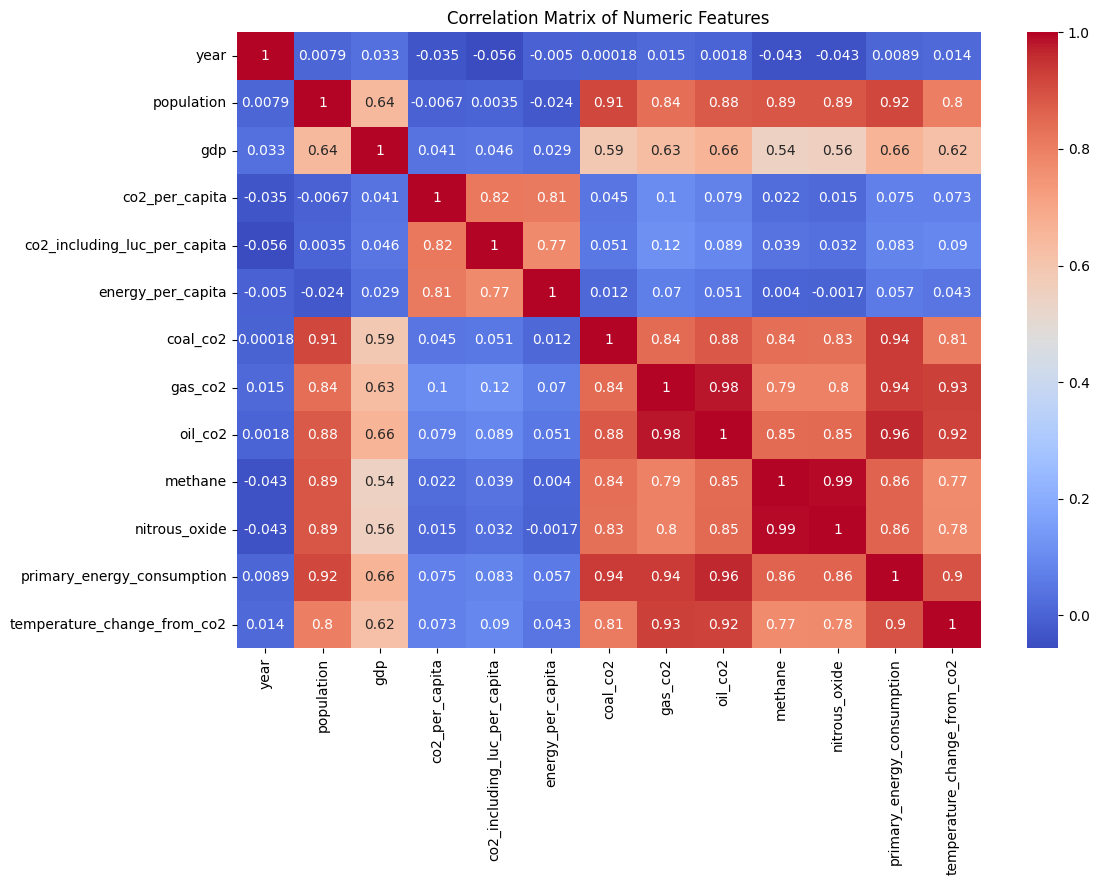

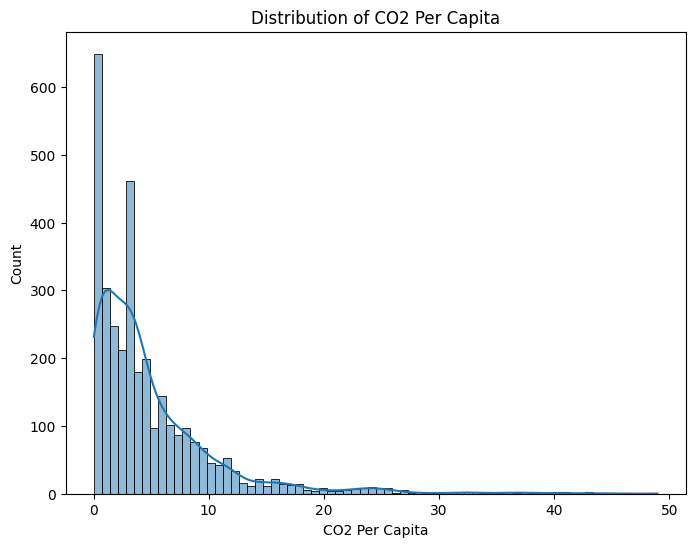

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Analyzing correlations to find important features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Selecting relevant features
target_variable = 'co2_per_capita'
feature_columns = ['gdp', 'population', 'energy_per_capita', 'primary_energy_consumption', 'coal_co2', 'gas_co2', 'oil_co2']

# Defining features (X) and target (y)
X = df[feature_columns]
y = df[target_variable]

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of CO2 Per Capita')
plt.xlabel('CO2 Per Capita')
plt.show()


# 3. Data Preparation
Data preparation is a crucial step in machine learning. Since most models only work with numeric data, categorical columns need to be converted into numerical form. For this dataset, we will use standard scaling for numeric features to ensure uniform scaling across all variables.


In [29]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling complete. Train and test sets are ready for modeling.")

Data scaling complete. Train and test sets are ready for modeling.


# 4. Model Building and Evaluation
We will explore various regression algorithms to predict `co2_per_capita`. Each model will be evaluated based on the following metrics:
- **RMSE (Root Mean Square Error)**
- **MAE (Mean Absolute Error)**
- **R2 (R-squared)**

We will analyze each model's performance and tune their hyperparameters for better results.


## Model 1: Linear Regression
Linear Regression is a simple and widely used regression model for predicting a continuous target variable.


Linear Regression Results:
RMSE: 3.3879, MAE: 1.6788, R2: 0.6521


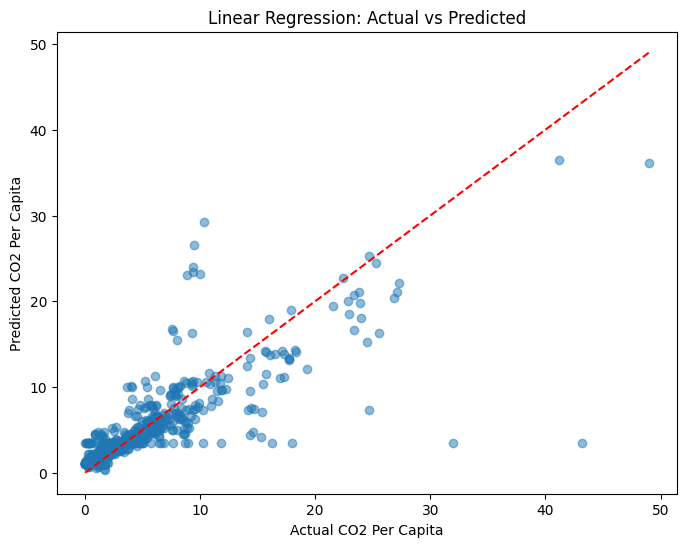

In [30]:
# Train and evaluate Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Results:\nRMSE: {rmse_lr:.4f}, MAE: {mae_lr:.4f}, R2: {r2_lr:.4f}")

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual CO2 Per Capita')
plt.ylabel('Predicted CO2 Per Capita')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## Model 2: Decision Tree Regressor
Decision Tree Regressors partition the data into different segments and fit a simple model to each one. This allows for modeling nonlinear relationships.


Decision Tree Results:
RMSE: 1.0802, MAE: 0.3673, R2: 0.9646


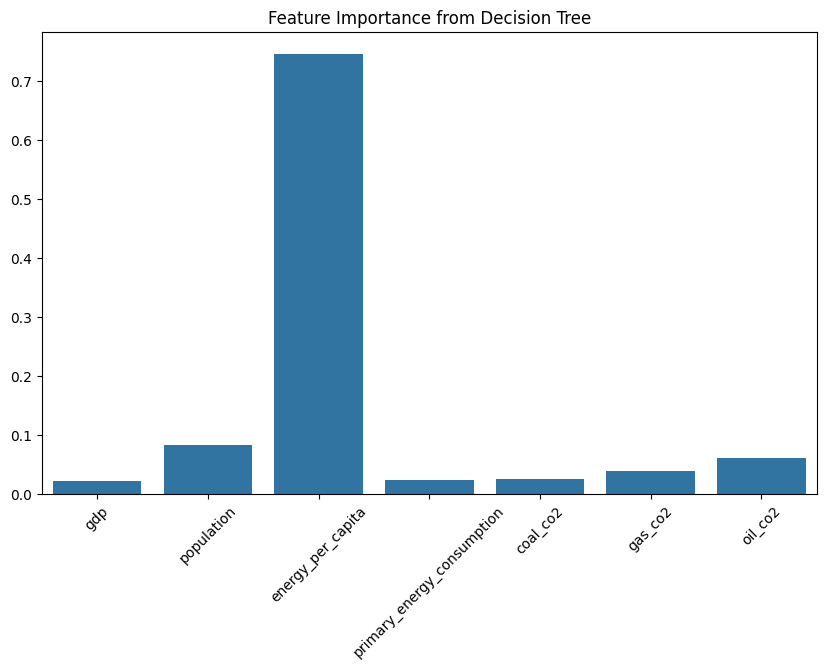

In [31]:
# Train and evaluate Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Results:\nRMSE: {rmse_dt:.4f}, MAE: {mae_dt:.4f}, R2: {r2_dt:.4f}")

# Feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_columns, y=dt.feature_importances_)
plt.title('Feature Importance from Decision Tree')
plt.xticks(rotation=45)
plt.show()

## Model 3: Random Forest Regressor
Random Forest is an ensemble model that uses multiple decision trees to improve predictive accuracy and control overfitting.


Random Forest Results:
RMSE: 1.0062, MAE: 0.3383, R2: 0.9693


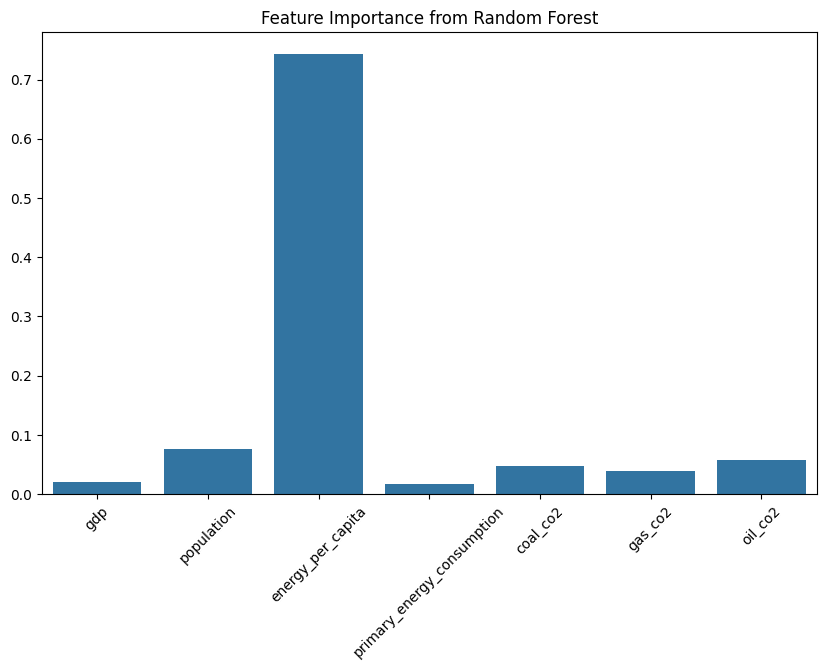

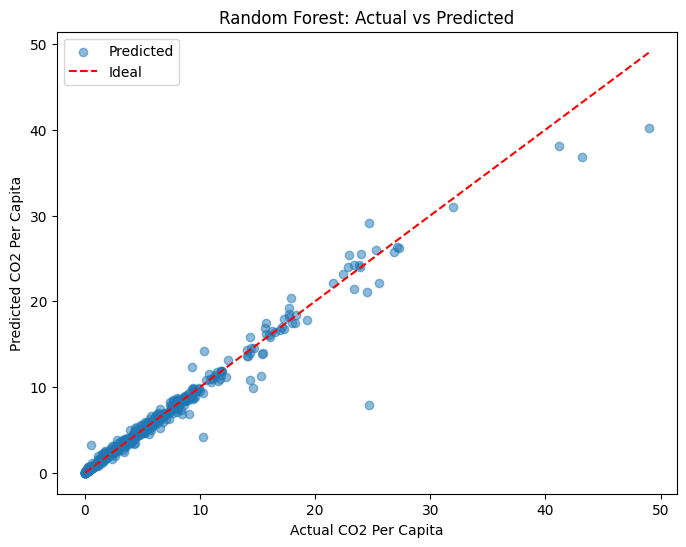

In [32]:
# Train and evaluate Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results:\nRMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R2: {r2_rf:.4f}")

# Feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_columns, y=rf.feature_importances_)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45)
plt.show()

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal')
plt.xlabel('Actual CO2 Per Capita')
plt.ylabel('Predicted CO2 Per Capita')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()


## Model 4: Gradient Boosting Regressor
Gradient Boosting is an ensemble model that builds trees sequentially, where each new tree corrects the errors of the previous trees. It often provides better accuracy than single models like Decision Trees.


Gradient Boosting Results:
RMSE: 1.5400, MAE: 0.8312, R2: 0.9281


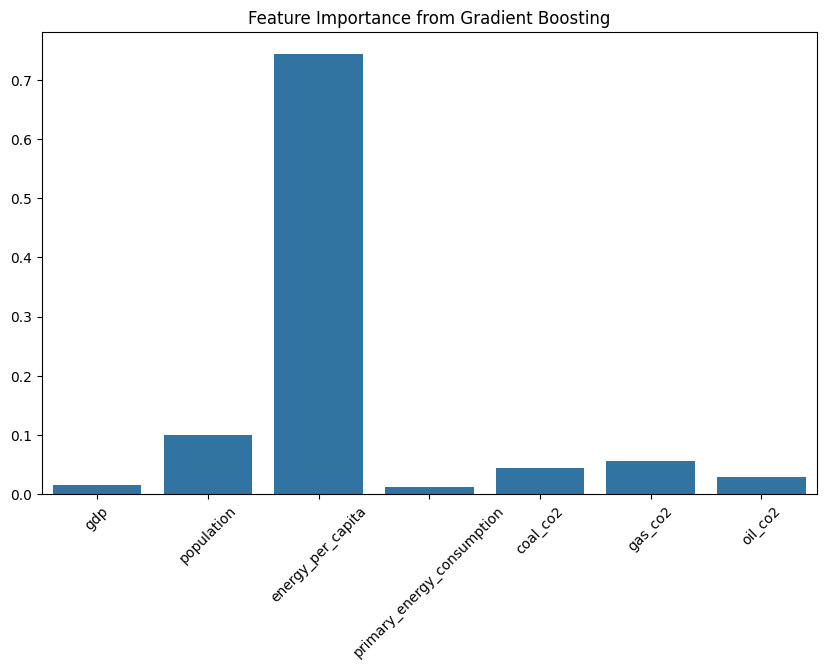

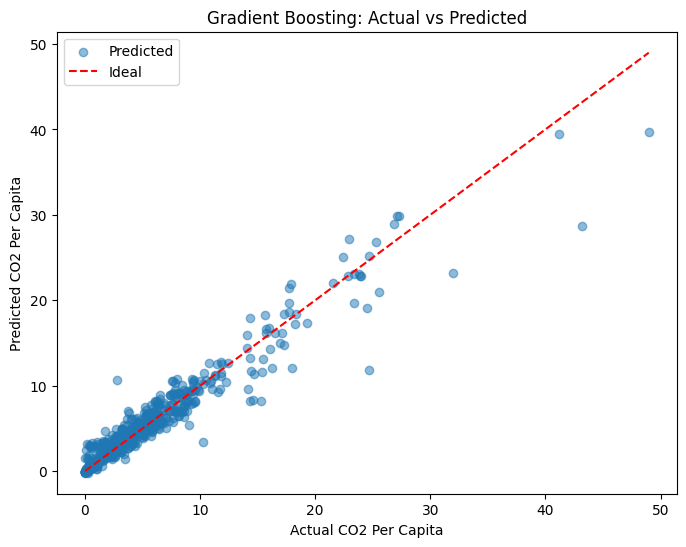

In [33]:
# Train and evaluate Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

# Evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Results:\nRMSE: {rmse_gb:.4f}, MAE: {mae_gb:.4f}, R2: {r2_gb:.4f}")

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_columns, y=gb.feature_importances_)
plt.title('Feature Importance from Gradient Boosting')
plt.xticks(rotation=45)
plt.show()

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal')
plt.xlabel('Actual CO2 Per Capita')
plt.ylabel('Predicted CO2 Per Capita')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.legend()
plt.show()


## Model 5: XGBoost Regressor
XGBoost is an efficient and scalable implementation of gradient boosting, and it often performs better and faster than traditional Gradient Boosting models.


XGBoost Results:
RMSE: 0.9006, MAE: 0.3687, R2: 0.9754


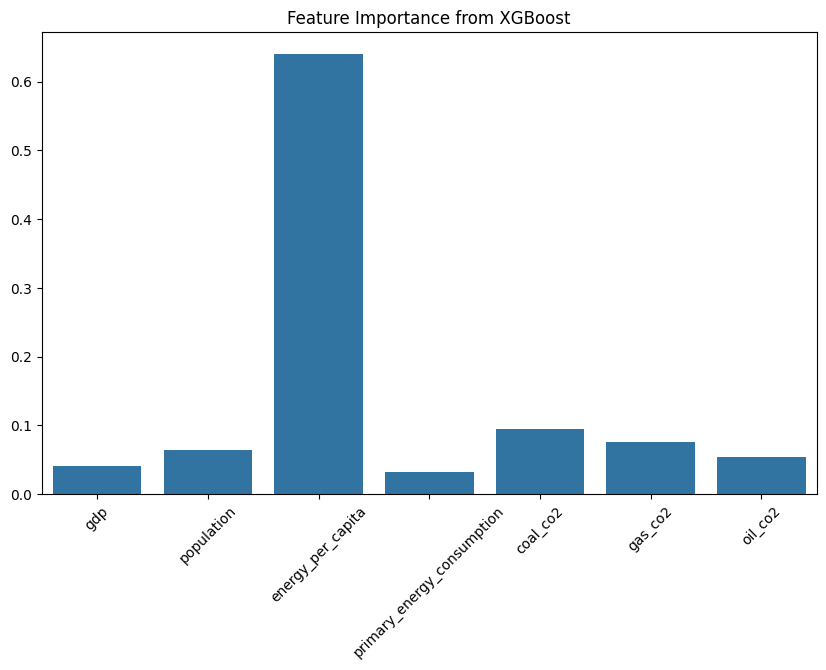

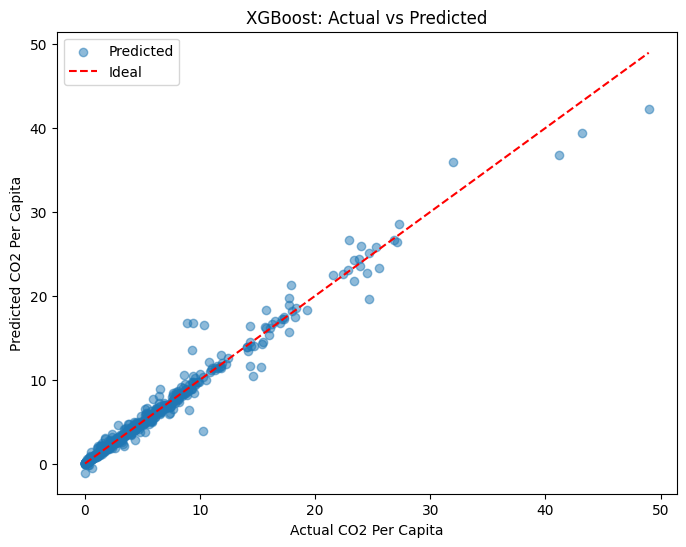

In [34]:
# Train and evaluate XGBoost model
xgb = XGBRegressor(random_state=42, eval_metric='rmse')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Results:\nRMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R2: {r2_xgb:.4f}")

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_columns, y=xgb.feature_importances_)
plt.title('Feature Importance from XGBoost')
plt.xticks(rotation=45)
plt.show()

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal')
plt.xlabel('Actual CO2 Per Capita')
plt.ylabel('Predicted CO2 Per Capita')
plt.title('XGBoost: Actual vs Predicted')
plt.legend()
plt.show()

## Model 6: LightGBM Regressor
LightGBM is another gradient boosting framework that is optimized for speed and efficiency. It is designed to handle large datasets effectively.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2662, number of used features: 7
[LightGBM] [Info] Start training from score 4.767776
LightGBM Results:
RMSE: 0.9960, MAE: 0.4267, R2: 0.9699


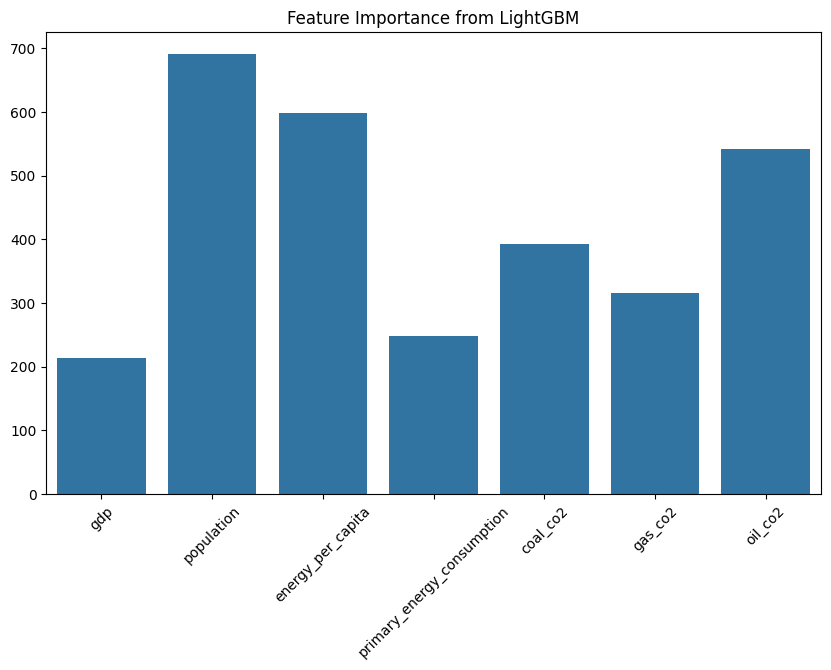

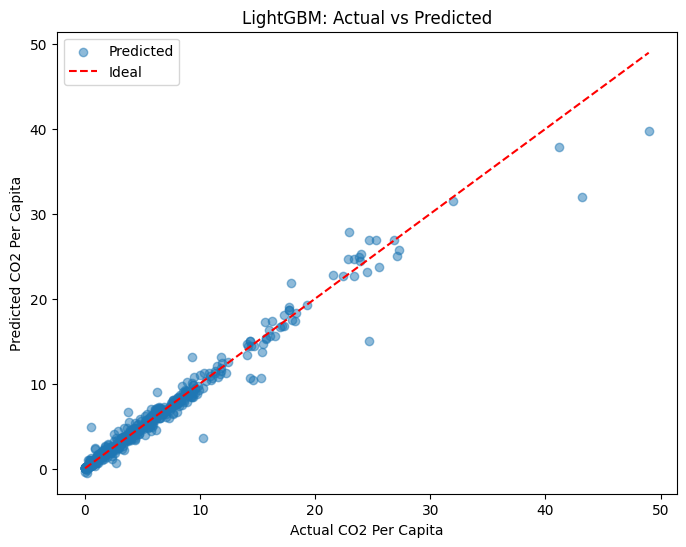

In [35]:
# Train and evaluate LightGBM model
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Evaluation metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM Results:\nRMSE: {rmse_lgbm:.4f}, MAE: {mae_lgbm:.4f}, R2: {r2_lgbm:.4f}")

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_columns, y=lgbm.feature_importances_)
plt.title('Feature Importance from LightGBM')
plt.xticks(rotation=45)
plt.show()

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgbm, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal')
plt.xlabel('Actual CO2 Per Capita')
plt.ylabel('Predicted CO2 Per Capita')
plt.title('LightGBM: Actual vs Predicted')
plt.legend()
plt.show()


## Model 7: Support Vector Regressor (SVR)
SVR is a regression technique that uses support vectors to fit the model. It's effective for high-dimensional spaces but can be sensitive to scaling.


SVR Results:
RMSE: 3.5598, MAE: 1.4467, R2: 0.6159


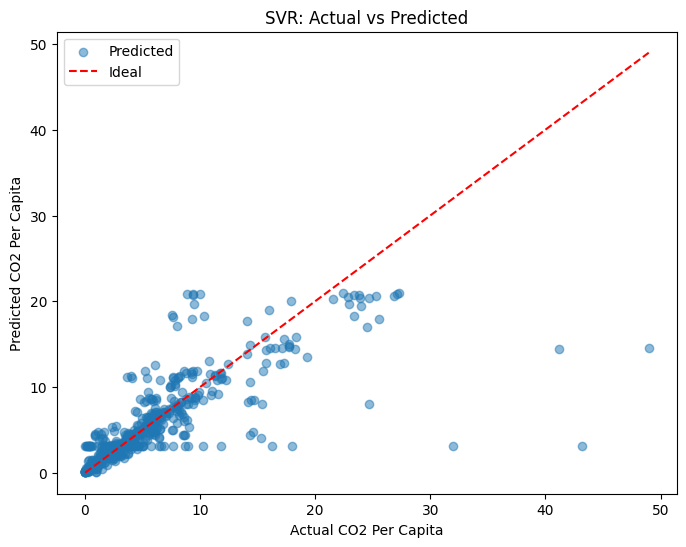

In [36]:
# Train and evaluate SVR model
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Results:\nRMSE: {rmse_svr:.4f}, MAE: {mae_svr:.4f}, R2: {r2_svr:.4f}")

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal')
plt.xlabel('Actual CO2 Per Capita')
plt.ylabel('Predicted CO2 Per Capita')
plt.title('SVR: Actual vs Predicted')
plt.legend()
plt.show()


# 5. Model Comparison and Visualization
We will compare all the models based on their RMSE, MAE, and R-squared scores. The goal is to identify the model that best predicts CO2 per capita based on our feature set.


Model Comparison:
                Model      RMSE       MAE        R2
4            XGBoost  0.900633  0.368744  0.975417
5           LightGBM  0.996025  0.426652  0.969934
2      Random Forest  1.006241  0.338320  0.969314
1      Decision Tree  1.080155  0.367278  0.964641
3  Gradient Boosting  1.539983  0.831211  0.928127
0  Linear Regression  3.387909  1.678809  0.652146
6                SVR  3.559822  1.446731  0.615948


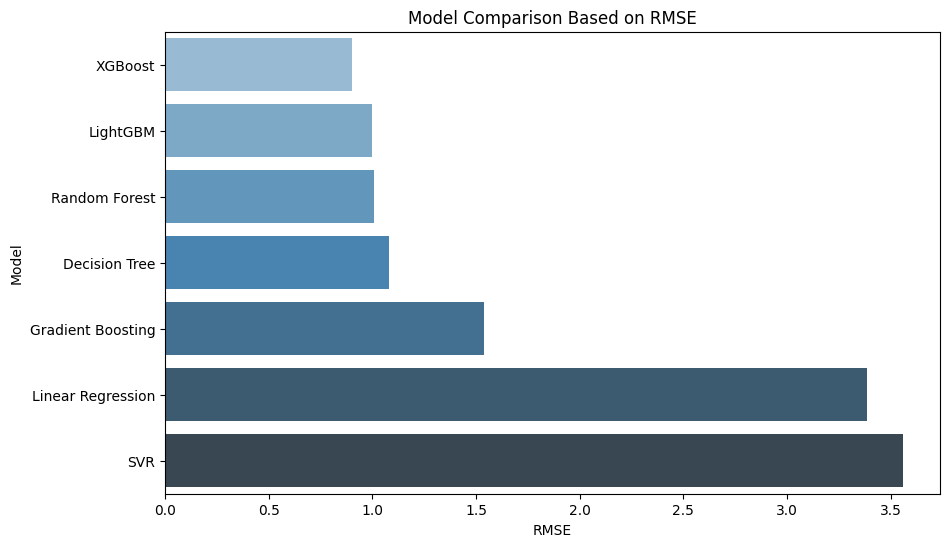

In [37]:
# Compile model results
model_results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'SVR'],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_gb, rmse_xgb, rmse_lgbm, rmse_svr],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_gb, mae_xgb, mae_lgbm, mae_svr],
    'R2': [r2_lr, r2_dt, r2_rf, r2_gb, r2_xgb, r2_lgbm, r2_svr]
}

results_df = pd.DataFrame(model_results)
results_df.sort_values(by='RMSE', ascending=True, inplace=True)
print("Model Comparison:\n", results_df)

# Visualization with hue and palette
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, hue='Model', palette='Blues_d', dodge=False, legend=False)
plt.title('Model Comparison Based on RMSE')
plt.show()

## Hyperparameter Tuning for Multiple Models
To further improve model performance, we will conduct hyperparameter tuning for Gradient Boosting, XGBoost, and LightGBM using Grid Search.


### Gradient Boosting Hyperparameter Tuning

In [38]:
# Define hyperparameters to tune for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train_scaled, y_train)

# Best Gradient Boosting model
best_gb = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb.predict(X_test_scaled)

# Evaluation metrics
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
rmse_best_gb = np.sqrt(mse_best_gb)
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print(f"Best Gradient Boosting Results:\nRMSE: {rmse_best_gb:.4f}, MAE: {mae_best_gb:.4f}, R2: {r2_best_gb:.4f}")
print("Best Parameters:", grid_search_gb.best_params_)


Best Gradient Boosting Results:
RMSE: 0.8708, MAE: 0.4312, R2: 0.9770
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


### XGBoost Hyperparameter Tuning

In [39]:
# Define hyperparameters to tune for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search for XGBoost
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42, eval_metric='rmse'), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_scaled, y_train)

# Best XGBoost model
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)

# Evaluation metrics
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Best XGBoost Results:\nRMSE: {rmse_best_xgb:.4f}, MAE: {mae_best_xgb:.4f}, R2: {r2_best_xgb:.4f}")
print("Best Parameters:", grid_search_xgb.best_params_)


Best XGBoost Results:
RMSE: 0.9217, MAE: 0.3732, R2: 0.9743
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


### LightGBM Hyperparameter Tuning

In [40]:
# Define hyperparameters to tune for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search for LightGBM
grid_search_lgbm = GridSearchCV(LGBMRegressor(random_state=42), param_grid_lgbm, cv=5, scoring='neg_mean_squared_error')
grid_search_lgbm.fit(X_train_scaled, y_train)

# Best LightGBM model
best_lgbm = grid_search_lgbm.best_estimator_
y_pred_best_lgbm = best_lgbm.predict(X_test_scaled)

# Evaluation metrics
mse_best_lgbm = mean_squared_error(y_test, y_pred_best_lgbm)
rmse_best_lgbm = np.sqrt(mse_best_lgbm)
mae_best_lgbm = mean_absolute_error(y_test, y_pred_best_lgbm)
r2_best_lgbm = r2_score(y_test, y_pred_best_lgbm)

print(f"Best LightGBM Results:\nRMSE: {rmse_best_lgbm:.4f}, MAE: {mae_best_lgbm:.4f}, R2: {r2_best_lgbm:.4f}")
print("Best Parameters:", grid_search_lgbm.best_params_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2129, number of used features: 7
[LightGBM] [Info] Start training from score 4.642605
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2129, number of used features: 7
[LightGBM] [Info] Start training from score 4.859255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2130, number of used features: 7
[LightGBM] [Info] Start training 

# Classification Modeling and Metrics
In addition to regression, we will apply classification algorithms to categorize the data based on `co2_per_capita`. We will categorize it into three classes (Low, Medium, High) based on quantiles and build classification models.


### Converting Target to Classes

In [41]:
# Binning CO2 per capita into classes
df['co2_category'] = pd.qcut(df['co2_per_capita'], q=3, labels=['Low', 'Medium', 'High'])

# Defining features and classification target
X_class = df[feature_columns]
y_class = df['co2_category']

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Scaling features for classification
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)


### Classification Models

In [42]:
# Define classification models
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC()
}

# Initialize dictionary for classification results
classification_scores = {}

# Train and evaluate each classification model
for name, model in classification_models.items():
    model.fit(X_train_class_scaled, y_train_class)
    y_pred_class = model.predict(X_test_class_scaled)
    
    accuracy = accuracy_score(y_test_class, y_pred_class)
    classification_scores[name] = accuracy
    
    print(f'{name} - Accuracy: {accuracy:.4f}')
    print(f'Classification Report for {name}:\n', classification_report(y_test_class, y_pred_class))
    print(f'Confusion Matrix for {name}:\n', confusion_matrix(y_test_class, y_pred_class), '\n')


Logistic Regression - Accuracy: 0.8123
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

        High       0.93      0.79      0.86       233
         Low       0.87      0.80      0.84       202
      Medium       0.69      0.84      0.76       231

    accuracy                           0.81       666
   macro avg       0.83      0.81      0.82       666
weighted avg       0.83      0.81      0.82       666

Confusion Matrix for Logistic Regression:
 [[185   0  48]
 [  0 162  40]
 [ 13  24 194]] 

Decision Tree - Accuracy: 0.9414
Classification Report for Decision Tree:
               precision    recall  f1-score   support

        High       0.96      0.94      0.95       233
         Low       0.97      0.94      0.95       202
      Medium       0.90      0.94      0.92       231

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0

# Visualization of Classification Model Performance
We will compare the accuracy of each classification model and visualize their confusion matrices.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19580\1111261379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(classification_scores.values()), y=list(classification_scores.keys()), palette='viridis')


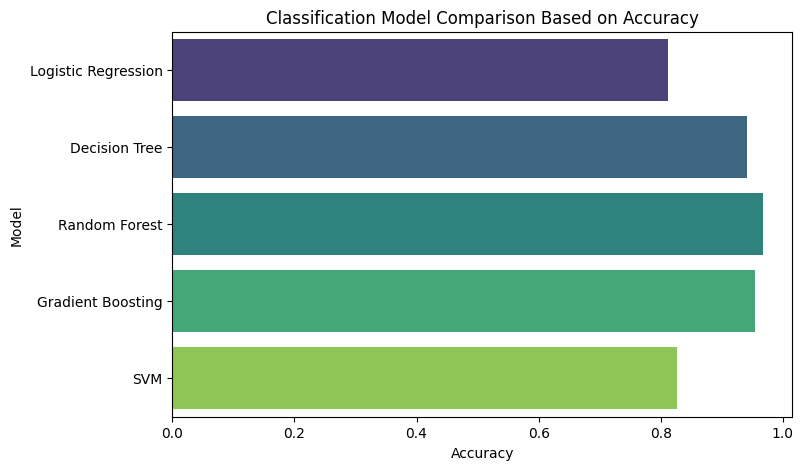

In [43]:
# Visualization of model accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=list(classification_scores.values()), y=list(classification_scores.keys()), palette='viridis')
plt.title('Classification Model Comparison Based on Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()


# Model Comparison Summary
## Regression Models
- Evaluated on RMSE, MAE, and R2 metrics.
- Hyperparameter tuning for Random Forest, Gradient Boosting, XGBoost, and LightGBM.

## Classification Models
- Evaluated on accuracy, precision, recall, and F1-score.
- Compared multiple models like Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and SVM.

This concludes the comprehensive benchmarking and analysis of both regression and classification models for predicting and classifying `co2_per_capita`.
